Data source : https://search.earthdata.nasa.gov/search/collection-details?p=C179003653-ORNL_DAAC&fst0=Atmosphere&fsm0=Clouds&fs10=Cloud+Amount%2FFrequency

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
import numpy as np

In [3]:
import datetime as datetime

In [4]:
df = pd.read_csv('canadian_5_day_avg_daily.dat')

In [5]:
df.head()

SITE_NAME       SUB_SITE   START_DATE     END_DATE  \
0  'NSA-999-THO01'  'STAFF-HISDY'  01-JAN-1975  05-JAN-1975   
1  'NSA-999-THO01'  'STAFF-HISDY'  06-JAN-1975  10-JAN-1975   
2  'NSA-999-THO01'  'STAFF-HISDY'  11-JAN-1975  15-JAN-1975   
3  'NSA-999-THO01'  'STAFF-HISDY'  16-JAN-1975  20-JAN-1975   
4  'NSA-999-THO01'  'STAFF-HISDY'  21-JAN-1975  25-JAN-1975   

   MEAN_MAX_AIR_TEMP  MEAN_MIN_AIR_TEMP  MEAN_AVG_AIR_TEMP  MEAN_PRECIP_1200  \
0              -11.6              -24.4              -18.0               0.0   
1              -18.1              -24.8              -21.5               0.1   
2              -23.7              -35.3              -29.5               0.5   
3              -28.4              -38.2              -33.3               0.3   
4              -23.3              -39.0              -31.2               0.1   

   MEAN_PRECIP_1800  MEAN_PRECIP_2400  MEAN_PRECIP_0600  MEAN_TOTAL_RAIN_24  \
0               0.2               0.1               0.0                 0.0   
1               0.5               0.9               1.0                 0.0   
2               0.6               0.8               0.4                 0.0   
3               0.4               0.1               0.0                 0.0   
4               0.0               0.3               0.4                 0.0   

   MEAN_TOTAL_SNOW_24  MEAN_TOTAL_PRECIP_24  MEAN_SNOW_DEPTH CRTFCN_CODE  \
0                 2.8                   0.3            360.0       'CPI'   
1                26.4                   2.4            360.0       'CPI'   
2                21.8                   2.2            454.0       'CPI'   
3                 7.2                   0.7            460.0       'CPI'   
4                 8.2                   0.8            468.0       'CPI'   

  REVISION_DATE  
0   10-NOV-1998  
1   10-NOV-1998  
2   10-NOV-1998  
3   10-NOV-1998  
4   10-NOV-1998

In [6]:
df.index = pd.DatetimeIndex(pd.to_datetime(df["START_DATE"]), tz="UTC")

In [7]:
df["local_starttime"]=df.index.tz_convert("America/Santiago")

In [8]:
df.index = pd.DatetimeIndex(pd.to_datetime(df["END_DATE"]), tz="UTC")

In [9]:
df["local_endtime"]=df.index.tz_convert("America/Santiago")

In [10]:
df['start_date'] = datetime.datetime(1975,1,1)
df['end_date'] = datetime.datetime(1975,1,1)


In [11]:
for index, row in df.iterrows():
    df.loc[index, 'start_date'] = datetime.datetime(row.local_starttime.year, row.local_starttime.month, row.local_starttime.day)
    df.loc[index, 'end_date'] = datetime.datetime(row.local_endtime.year, row.local_endtime.month, row.local_endtime.day)

In [12]:
df.head()

SITE_NAME       SUB_SITE   START_DATE  \
END_DATE                                                                 
1975-01-05 00:00:00+00:00  'NSA-999-THO01'  'STAFF-HISDY'  01-JAN-1975   
1975-01-10 00:00:00+00:00  'NSA-999-THO01'  'STAFF-HISDY'  06-JAN-1975   
1975-01-15 00:00:00+00:00  'NSA-999-THO01'  'STAFF-HISDY'  11-JAN-1975   
1975-01-20 00:00:00+00:00  'NSA-999-THO01'  'STAFF-HISDY'  16-JAN-1975   
1975-01-25 00:00:00+00:00  'NSA-999-THO01'  'STAFF-HISDY'  21-JAN-1975   

                              END_DATE  MEAN_MAX_AIR_TEMP  MEAN_MIN_AIR_TEMP  \
END_DATE                                                                       
1975-01-05 00:00:00+00:00  05-JAN-1975              -11.6              -24.4   
1975-01-10 00:00:00+00:00  10-JAN-1975              -18.1              -24.8   
1975-01-15 00:00:00+00:00  15-JAN-1975              -23.7              -35.3   
1975-01-20 00:00:00+00:00  20-JAN-1975              -28.4              -38.2   
1975-01-25 00:00:00+00:00  25-JAN-1975              -23.3              -39.0   

                           MEAN_AVG_AIR_TEMP  MEAN_PRECIP_1200  \
END_DATE                                                         
1975-01-05 00:00:00+00:00              -18.0               0.0   
1975-01-10 00:00:00+00:00              -21.5               0.1   
1975-01-15 00:00:00+00:00              -29.5               0.5   
1975-01-20 00:00:00+00:00              -33.3               0.3   
1975-01-25 00:00:00+00:00              -31.2               0.1   

                           MEAN_PRECIP_1800  MEAN_PRECIP_2400    ...      \
END_DATE                                                         ...       
1975-01-05 00:00:00+00:00               0.2               0.1    ...       
1975-01-10 00:00:00+00:00               0.5               0.9    ...       
1975-01-15 00:00:00+00:00               0.6               0.8    ...       
1975-01-20 00:00:00+00:00               0.4               0.1    ...       
1975-01-25 00:00:00+00:00               0.0               0.3    ...       

                           MEAN_TOTAL_RAIN_24  MEAN_TOTAL_SNOW_24  \
END_DATE                                                            
1975-01-05 00:00:00+00:00                 0.0                 2.8   
1975-01-10 00:00:00+00:00                 0.0                26.4   
1975-01-15 00:00:00+00:00                 0.0                21.8   
1975-01-20 00:00:00+00:00                 0.0                 7.2   
1975-01-25 00:00:00+00:00                 0.0                 8.2   

                           MEAN_TOTAL_PRECIP_24  MEAN_SNOW_DEPTH  CRTFCN_CODE  \
END_DATE                                                                        
1975-01-05 00:00:00+00:00                   0.3            360.0        'CPI'   
1975-01-10 00:00:00+00:00                   2.4            360.0        'CPI'   
1975-01-15 00:00:00+00:00                   2.2            454.0        'CPI'   
1975-01-20 00:00:00+00:00                   0.7            460.0        'CPI'   
1975-01-25 00:00:00+00:00                   0.8            468.0        'CPI'   

                          REVISION_DATE           local_starttime  \
END_DATE                                                            
1975-01-05 00:00:00+00:00   10-NOV-1998 1974-12-31 21:00:00-03:00   
1975-01-10 00:00:00+00:00   10-NOV-1998 1975-01-05 21:00:00-03:00   
1975-01-15 00:00:00+00:00   10-NOV-1998 1975-01-10 21:00:00-03:00   
1975-01-20 00:00:00+00:00   10-NOV-1998 1975-01-15 21:00:00-03:00   
1975-01-25 00:00:00+00:00   10-NOV-1998 1975-01-20 21:00:00-03:00   

                                      local_endtime start_date   end_date  
END_DATE                                                                   
1975-01-05 00:00:00+00:00 1975-01-04 21:00:00-03:00 1974-12-31 1975-01-04  
1975-01-10 00:00:00+00:00 1975-01-09 21:00:00-03:00 1975-01-05 1975-01-09  
1975-01-15 00:00:00+00:00 1975-01-14 21:00:00-03:00 1975-01-10 1975-01-14  
1975-01-20 00:00:00+00:00 1975-01-19 21:0

In [13]:
df['MEAN_AVG_AIR_TEMP'].replace(-999, 0, inplace=True)


In [14]:
df['MEAN_MAX_AIR_TEMP'].replace(-999, 0, inplace=True)


In [15]:
df['MEAN_MIN_AIR_TEMP'].replace(-999, 0, inplace=True)


In [16]:
import matplotlib
% matplotlib inline

In [17]:
import matplotlib.pyplot as plt

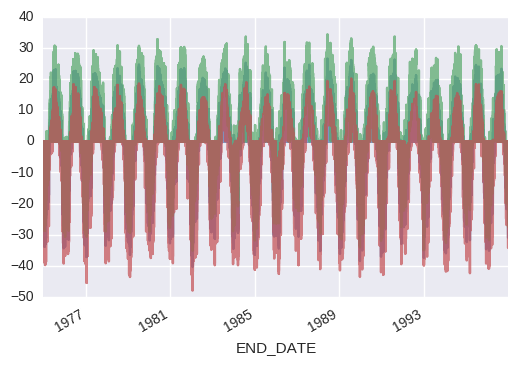

In [18]:
df['MEAN_AVG_AIR_TEMP'].plot(alpha=0.7)
df['MEAN_MAX_AIR_TEMP'].plot(alpha=0.7)
df['MEAN_MIN_AIR_TEMP'].plot(alpha=0.7)
plt.show()

In [19]:
import plotly.plotly as py
import plotly.graph_objs as go
import plotly
plotly.offline.init_notebook_mode()

In [20]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [21]:
pdf = pd.DataFrame(df, columns=['MEAN_MAX_AIR_TEMP'])

In [49]:
dataset = pdf['MEAN_MAX_AIR_TEMP'].values

In [50]:
dataset = dataset.astype('float32')

In [52]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size], dataset[train_size:len(dataset)]
print(len(train), len(test))

(24359, 11999)


In [53]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back)]
        dataX.append(a)
        dataY.append(dataset[i + look_back])
    return np.array(dataX), np.array(dataY)

In [54]:
# reshape into X=t and Y=t+1
look_back = 10
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [55]:
# create and fit Multilayer Perceptron model
model = Sequential()
model.add(Dense(8, input_dim=look_back, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, nb_epoch=200, batch_size=2, verbose=2)

Epoch 1/200
23s - loss: 34.0321
Epoch 2/200
23s - loss: 30.8039
Epoch 3/200
22s - loss: 30.5592
Epoch 4/200
22s - loss: 30.4039
Epoch 5/200
22s - loss: 30.2000
Epoch 6/200
22s - loss: 30.0740
Epoch 7/200
22s - loss: 29.8746
Epoch 8/200
22s - loss: 29.7712
Epoch 9/200
22s - loss: 29.6118
Epoch 10/200
22s - loss: 29.5135
Epoch 11/200
22s - loss: 29.3287
Epoch 12/200
23s - loss: 29.2518
Epoch 13/200
22s - loss: 29.1248
Epoch 14/200
22s - loss: 29.0766
Epoch 15/200
22s - loss: 28.9898
Epoch 16/200
22s - loss: 28.8690
Epoch 17/200
23s - loss: 28.7937
Epoch 18/200
23s - loss: 28.7457
Epoch 19/200
22s - loss: 28.7069
Epoch 20/200
22s - loss: 28.6128
Epoch 21/200
23s - loss: 28.6296
Epoch 22/200
22s - loss: 28.5284
Epoch 23/200
22s - loss: 28.5138
Epoch 24/200
22s - loss: 28.4083
Epoch 25/200
22s - loss: 28.3407
Epoch 26/200
22s - loss: 28.3977
Epoch 27/200
22s - loss: 28.3092
Epoch 28/200
22s - loss: 28.2762
Epoch 29/200
22s - loss: 28.2535
Epoch 30/200
22s - loss: 28.2648
Epoch 31/200
22s - 

In [56]:
import math
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 27.37 MSE (5.23 RMSE)
Test Score: 26.94 MSE (5.19 RMSE)


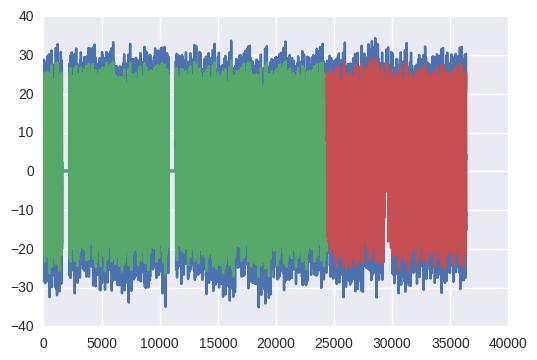

In [62]:
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back] = trainPredict[:,0]

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1] = testPredict[:,0]

# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [57]:
import plotly.plotly as py
import plotly.graph_objs as go
import plotly
plotly.offline.init_notebook_mode()

In [47]:
pdf.head()

MEAN_MAX_AIR_TEMP
END_DATE                                    
1975-01-05 00:00:00+00:00              -11.6
1975-01-10 00:00:00+00:00              -18.1
1975-01-15 00:00:00+00:00              -23.7
1975-01-20 00:00:00+00:00              -28.4
1975-01-25 00:00:00+00:00              -23.3

In [67]:
traces = [
    go.Scatter(  
        y=dataset,
        name='Max Temp',
        opacity=0.7,
        fill='tozeroy'
    ),
    go.Scatter(  
        y=trainPredictPlot,
        name='Training Prediction Max Temp',
        opacity=0.7,
        fill='tozeroy'
    )
]
plotly.offline.iplot(traces)    

In [68]:
traces = [
    go.Scatter(  
        y=dataset,
        name='Max Temp',
        opacity=0.7,
        fill='tozeroy'
    ),
    go.Scatter(  
        y=testPredictPlot,
        name='Test Prediction Max Temp',
        opacity=0.7,
        fill='tozeroy'
    )
]
plotly.offline.iplot(traces)    

In [72]:
rounded_data = np.round(pdf['MEAN_MAX_AIR_TEMP'].rolling(window=20,center=False).mean(),2)

In [78]:
rounded_data = rounded_data.dropna()

In [79]:
rounded_data.head()

END_DATE
1975-04-10 00:00:00+00:00   -13.29
1975-04-15 00:00:00+00:00   -12.26
1975-04-20 00:00:00+00:00   -11.12
1975-04-25 00:00:00+00:00    -9.44
1975-04-30 00:00:00+00:00    -7.37
Name: MEAN_MAX_AIR_TEMP, dtype: float64

In [80]:
traces = [
    go.Scatter(  
        y=rounded_data,
        name='Moving Average',
        opacity=0.7,
        fill='tozeroy'
    )
]
plotly.offline.iplot(traces)    